### Import paczek

In [256]:
include("utils/GlobalUsings.jl")
include("utils/DataLoader.jl")
include("Lib/CustomDiffLib.jl")
include("utils/NetFunctions.jl")
include("utils/Ploter.jl")

plotTestAccuracty (generic function with 1 method)

##  Załadowanie danych

In [257]:
X_train, y_train, X_test, y_test, classes  = getPrepearedData()
nothing

## SIEĆ FLUX

In [258]:
include("nets/netFlux.jl")
fluxNet, opt, loss, params = getDefaultFlux()
fluxLossHistory, fluxAccuracyTrainingHistory = train(fluxNet, params, X_train, y_train, 5, opt, loss)
fluxAccuracyTrainingVal = getTrainingAccValFromHistory(fluxAccuracyTrainingHistory)
fluxAccuracyTestHistory, fluxAccuracyTestVal = getFluxAccuracyValFromTest(fluxNet, X_test, y_test)
nothing

#### Wykresy 

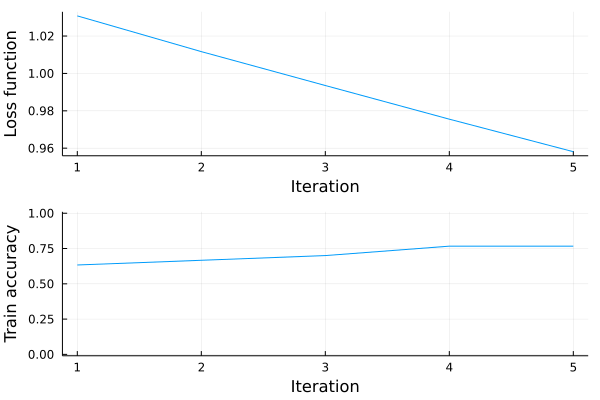

In [259]:
plotLossAccuracy(fluxLossHistory, fluxAccuracyTrainingHistory)

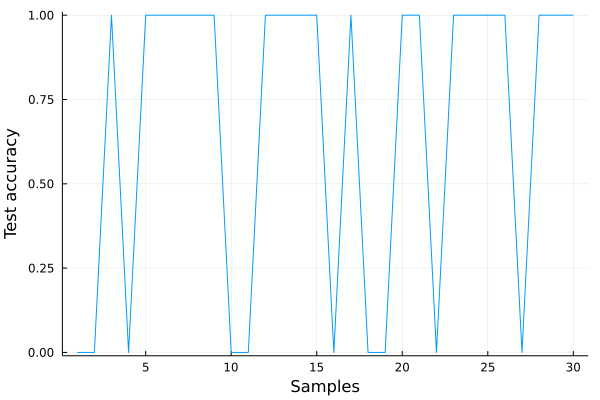

In [260]:
plotTestAccuracty(fluxAccuracyTestHistory)

### Sieć Ani

In [261]:
include("nets/NetAnia.jl")
aniaNet = getDefaultAniaNet()
aniaLossHistory, AniaAccHistory = trainAnia(aniaNet, X_train, y_train, 5, 0.01)
aniaAccTrainVal = getTrainingAccValFromHistory(AniaAccHistory)
acc_history, AniaTestAccVal = accuracy(aniaNet, X_test, y_test)
nothing

### Wykresy

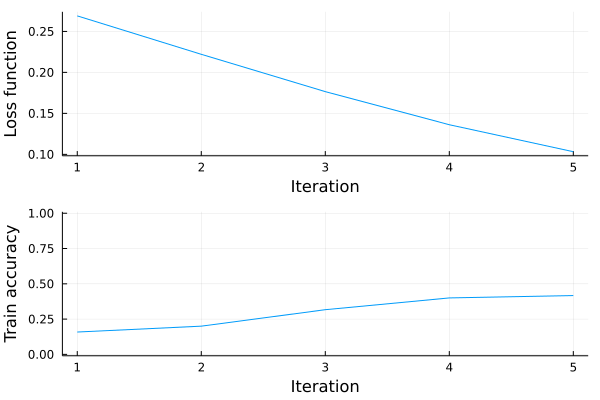

In [262]:
plotLossAccuracy(aniaLossHistory, AniaAccHistory)

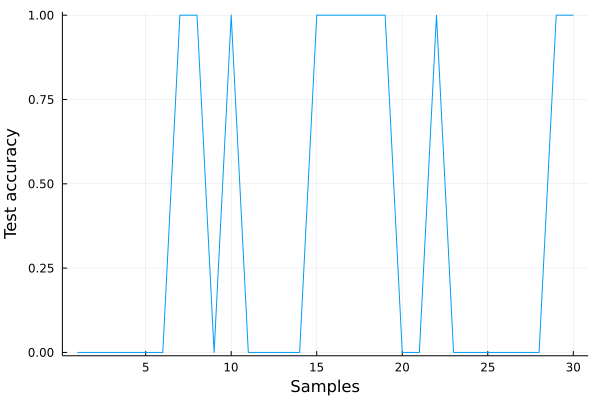

In [263]:
plotTestAccuracty(acc_history)

## Sieć Sebastiana

In [264]:
include("nets/netSebastian.jl")
sebastianNet = getSebastianDefaultNet()
sebastianTrainLoss, sebastianTrainAccHistory = trainSebastian(sebastianNet, X_train, y_train, 5, 0.01)

sebastianTrainAccVal = getTrainingAccValFromHistory(sebastianTrainAccHistory)
sebastianTestAccuracuy, sebastianTestAccVal = accuracySebastian(sebastianNet, X_test, y_test)
nothing


### Wykresy

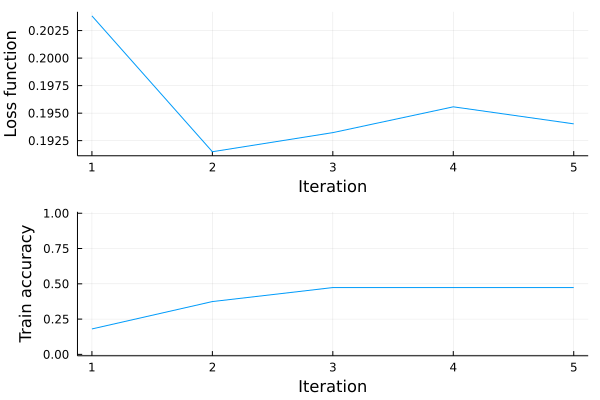

In [265]:
plotLossAccuracy(sebastianTrainLoss, sebastianTrainAccHistory)

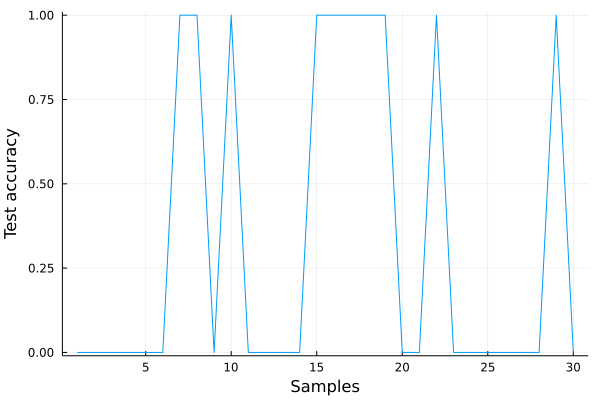

In [266]:
plotTestAccuracty(sebastianTestAccuracuy)

In [267]:
df_learning_results = DataFrame(Net=String[], TestAccuracy=Float64[], TrainAccuracy=Float64[], LossFunctionMinimum=Float64[], LossFunctionMaximum=Float64[],LossFunctionStd=Float64[] )
push!(df_learning_results, ("Flux", fluxAccuracyTestVal, fluxAccuracyTrainingVal, minimum(fluxLossHistory), maximum(fluxLossHistory), std(fluxLossHistory)))
push!(df_learning_results, ("Ania", AniaTestAccVal, aniaAccTrainVal, minimum(aniaLossHistory), maximum(aniaLossHistory), std(aniaLossHistory)))
push!(df_learning_results, ("Sebastian", sebastianTestAccVal, sebastianTrainAccVal, minimum(sebastianTrainLoss), maximum(sebastianTrainLoss), std(sebastianTrainLoss)))
print(df_learning_results)

3×6 DataFrame
 Row │ Net        TestAccuracy  TrainAccuracy  LossFunctionMinimum  LossFunctionMaximum  LossFunctionStd 
     │ String     Float64       Float64        Float64              Float64              Float64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Flux           0.666667       0.706667             0.958116             1.03078        0.0286965
   2 │ Ania           0.366667       0.298333             0.103195             0.26895        0.0661571
   3 │ Sebastian      0.333333       0.394928             0.191496             0.203831       0.00481354